In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importar dados
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')


In [131]:
#esumo estatístico das colunas do DataFrame
orders.describe(include='all')
# order_items.describe(include='all')
# products.describe(include='all')
# customers.describe(include='all')
# category_translation.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [132]:
# Verificar dados faltantes e os tipos
print(orders.info()) # Exibe informações sobre o DataFrame 'orders', incluindo o número de entradas, o tipo de dados de cada coluna e a quantidade de valores não nulos.
print(order_items.info())
print(products.info())
print(customers.info())
print(category_translation.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

In [133]:
# Convertendo colunas do DataFrame para datetime,permitindo operações e análises baseadas em data e hora.
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [134]:
# Merge dos DataFrames
merged_data = pd.merge(orders, order_items, on='order_id') #Realiza a junção do DataFrames 'orders' e 'order_items' usando a coluna 'order_id' como chave comum. O resultado é armazenado no DataFrame 'merged_data'.
merged_data = pd.merge(merged_data, products, on='product_id')# Realiza a junção do DataFrame 'merged_data' (resultado da junção anterior) com o DataFrame 'products' usando a coluna 'product_id' como chave comum.
merged_data = pd.merge(merged_data, customers, on='customer_id')# Realiza a junção do DataFrame 'merged_data' (resultado da junção anterior) com o DataFrame 'customers' usando a coluna 'customer_id' como chave comum.
merged_data = pd.merge(merged_data, category_translation, left_on='product_category_name', right_on='product_category_name') # Realiza a junção do DataFrame 'merged_data' (resultado da junção anterior) com o DataFrame 'category_translation' usando a coluna 'product_category_name' como chave comum. Neste caso, a chave é especificada para as colunas esquerda e direita usando 'left_on' e 'right_on'.

In [135]:
# Verificar os tipos de dados
print(merged_data.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

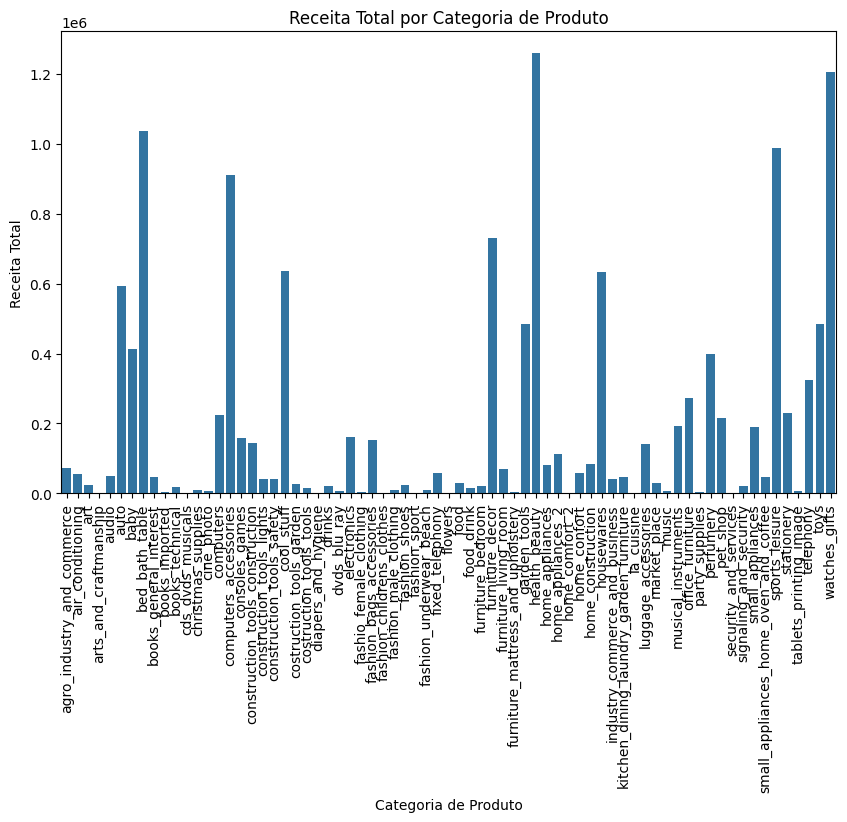

In [136]:
# Receita total por categoria de produto
category_sales = merged_data.groupby('product_category_name_english')['price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='price', data=category_sales)
plt.xticks(rotation=90)
plt.title('Receita Total por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Receita Total')
plt.show()


O gráfico de barras mostra a receita total acumulada por categoria de produto. Cada barra representa a receita gerada por uma categoria específica, permitindo identificar quais categorias são mais lucrativas e quais têm menor desempenho. Ele ajuda a visualizar o desempenho financeiro das categorias de produtos, facilitando comparações e decisões estratégicas.

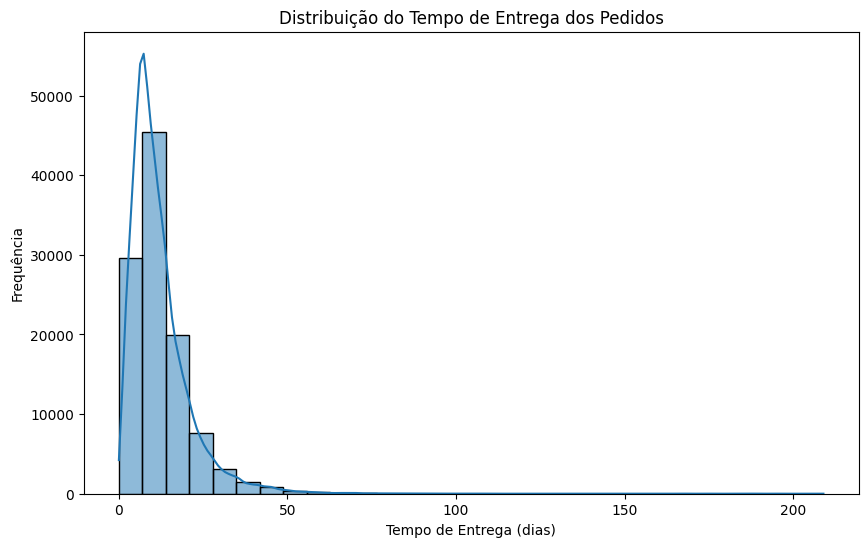

In [137]:
# Calculando o tempo de entrega
merged_data['delivery_time'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['delivery_time'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Entrega dos Pedidos')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.show()


Este gráfico permite identificar a distribuição dos tempos de entrega, destacando a frequência de diferentes intervalos de dias. Ele ajuda a entender se a maioria dos pedidos é entregue rapidamente ou se há um atraso significativo na entrega.

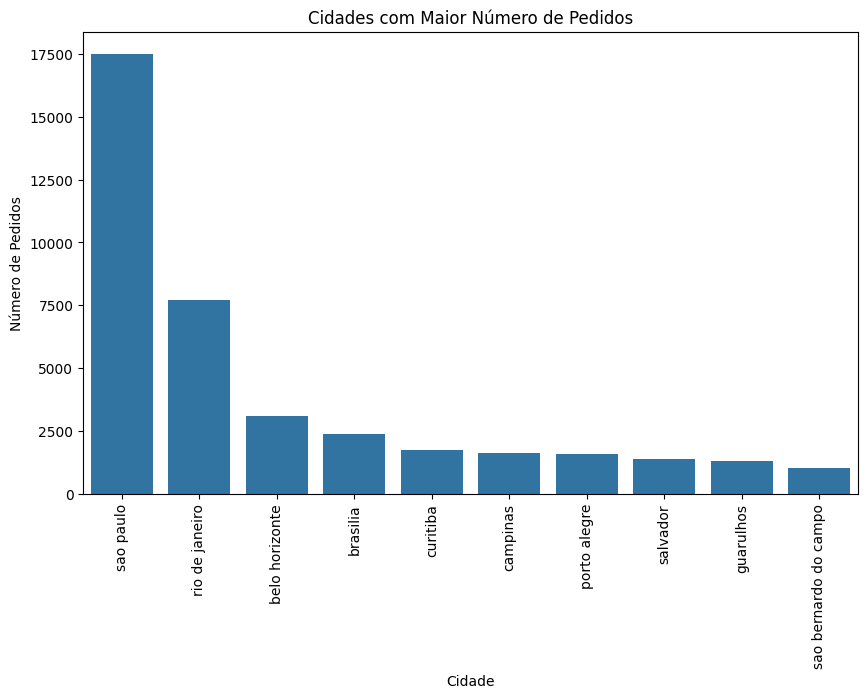

In [138]:
# Contagem de pedidos por cidade
city_orders = merged_data['customer_city'].value_counts().reset_index()
city_orders.columns = ['customer_city', 'number_of_orders']

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='number_of_orders', data=city_orders.head(10))
plt.xticks(rotation=90)
plt.title('Cidades com Maior Número de Pedidos')
plt.xlabel('Cidade')
plt.ylabel('Número de Pedidos')
plt.show()


Este gráfico ajuda a identificar quais cidades têm o maior volume de pedidos, permitindo que você compreenda a distribuição geográfica dos pedidos e identifique as áreas com maior demanda. Ele destaca as 10 cidades com o maior número de pedidos, facilitando a análise do mercado e a tomada de decisões estratégicas relacionadas à logística e marketing.

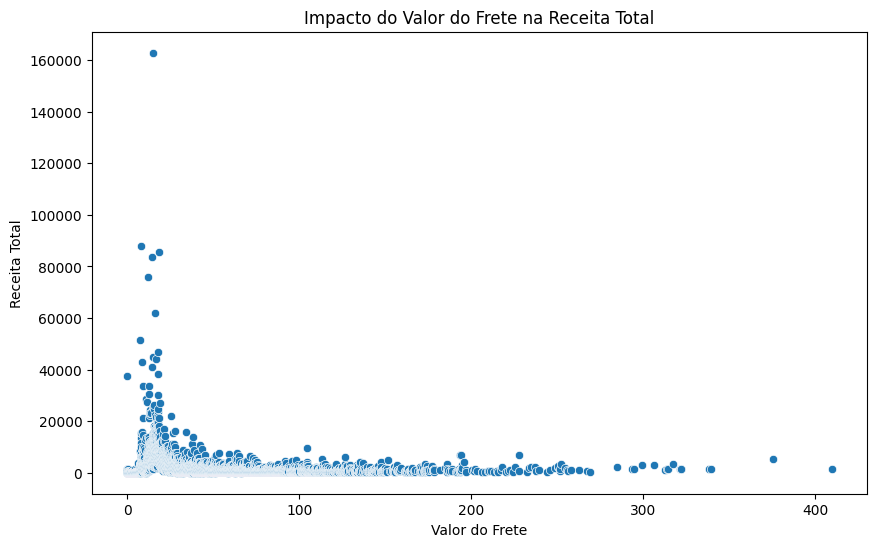

In [139]:
# Receita total com e sem frete
merged_data['total_value'] = merged_data['price'] + merged_data['freight_value']
freight_impact = merged_data.groupby('freight_value')['total_value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='freight_value', y='total_value', data=freight_impact)
plt.title('Impacto do Valor do Frete na Receita Total')
plt.xlabel('Valor do Frete')
plt.ylabel('Receita Total')
plt.show()


Este gráfico ilustra como as variações no valor do frete impactam a receita total dos pedidos. Ele ajuda a visualizar se um aumento no frete tende a aumentar ou diminuir a receita total e pode fornecer insights sobre a relação entre custos de envio e o total faturado. Analisando a dispersão dos pontos, você pode identificar padrões ou tendências, como se o valor do frete está fortemente correlacionado com a receita total.

In [140]:
# Verificar os tipos de dados
print(merged_data.dtypes)



order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

In [141]:
print(monthly_sales.head())
print(monthly_sales.dtypes)


  year_month      price
0    2016-09     267.36
1    2016-10   49441.77
2    2016-12      10.90
3    2017-01  118610.23
4    2017-02  238268.92
year_month     object
price         float64
dtype: object


In [142]:
# Converter 'year_month' para string se necessário
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Garantir que 'price' é numérico
monthly_sales['price'] = pd.to_numeric(monthly_sales['price'], errors='coerce')

# Verificar novamente os tipos de dados
print(monthly_sales.dtypes)


year_month     object
price         float64
dtype: object


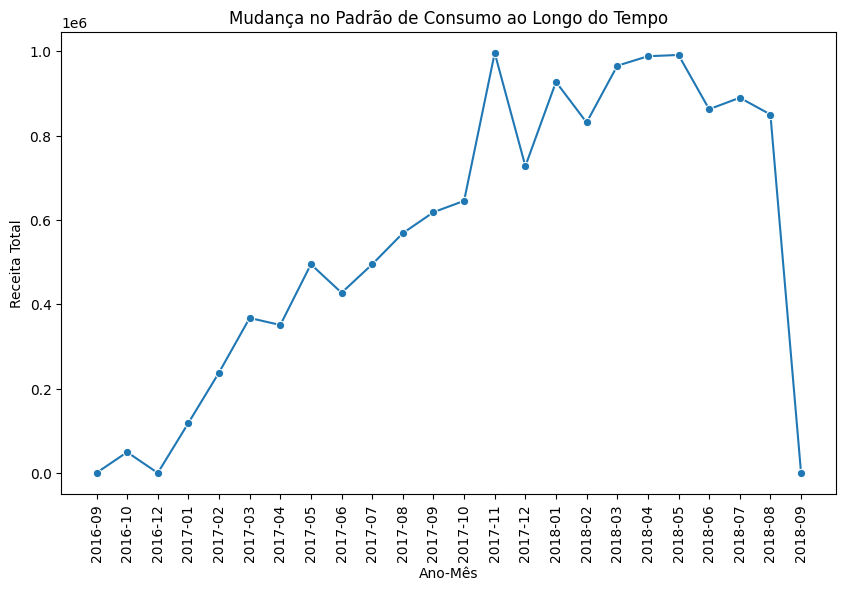

In [143]:

plt.figure(figsize=(10,6))
sns.lineplot(x='year_month', y='price', data=monthly_sales, marker='o')
plt.xticks(rotation=90)
plt.title('Mudança no Padrão de Consumo ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Receita Total')
plt.show()

Este gráfico mostra a mudança no padrão de consumo ao longo d tempo. Reflete um padrão de crescimento, culminando em um declinio significativo no final, 

Perfil do Cliente que Mais Compra:
customer_id                 1617b1357756262bfa56ab541c47bc16
total_spending                                       13440.0
customer_unique_id          0a0a92112bd4c708ca5fde585afaa872
customer_zip_code_prefix                               20080
customer_city                                 rio de janeiro
customer_state                                            RJ
Name: 8379, dtype: object


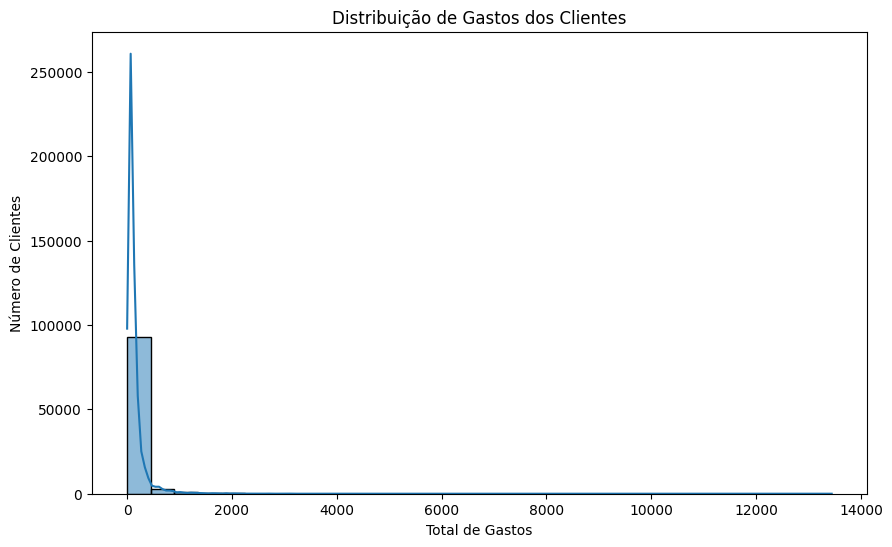

In [144]:
# Agrupando por cliente e somando o total de compras
customer_total_spending = merged_data.groupby('customer_id')['price'].sum().reset_index()
customer_total_spending.columns = ['customer_id', 'total_spending']

# Mesclando com os dados dos clientes para obter características adicionais
customer_profile = pd.merge(customer_total_spending, customers, on='customer_id')

# Encontrando o cliente com o maior total de compras
top_customer = customer_profile.loc[customer_profile['total_spending'].idxmax()]

print("Perfil do Cliente que Mais Compra:")
print(top_customer)

# Analisando a distribuição de gastos dos clientes
plt.figure(figsize=(10, 6))
sns.histplot(customer_profile['total_spending'], bins=30, kde=True)
plt.title('Distribuição de Gastos dos Clientes')
plt.xlabel('Total de Gastos')
plt.ylabel('Número de Clientes')
plt.show()

O gráfico demostra que a maioria dos clientes gasta pouco, enquanto poucos gastam muito, criando uma distribuição altamente assimétrica

In [145]:
merged_data.to_csv('base_final.csv', index=False)